Data Points: 146
Features: 21
Number of POI: 18


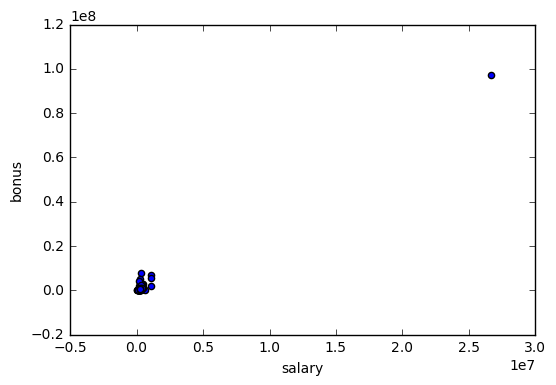

26 total features: ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'total_payments', 'total_stock_value', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'fraction_to_poi']

25 best features scores: [ 20.79225205   0.22461127  11.45847658   2.1263278   24.81507973
   6.09417331   7.18405566   9.92218601   4.18747751   9.21281062
   0.06549965  18.28968404   8.77277773  24.18289868   0.16970095
   5.24344971   2.38261211   8.58942073   1.64634113   1.64634113
   5.24344971   0.16970095   2.38261211   8.58942073   0.14313106]

7 best features: ['salary', 'bonus', 'total_stock_value', 'exercised_stock_options', 'deferred_income', 'restricted_st

In [2]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

target_label = 'poi'

email_features_list = ['from_messages',
                       'from_poi_to_this_person',
                       'from_this_person_to_poi',
                       'shared_receipt_with_poi',
                       'to_messages']

financial_features_list = ['bonus',
                           'deferral_payments',
                           'deferred_income',
                           'director_fees',
                           'exercised_stock_options',
                           'expenses',
                           'loan_advances',
                           'long_term_incentive',
                           'other',
                           'restricted_stock',
                           'restricted_stock_deferred',
                           'salary',
                           'total_payments',
                           'total_stock_value']

features_list = [target_label] + financial_features_list + email_features_list


# You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
#explore data
num_data_points=len(data_dict)
num_data_features = len(data_dict[data_dict.keys()[0]])
num_data_poi=len(dict((key, value) for key, value in data_dict.items() if value["poi"] == True))

print "Data Points:", num_data_points
print "Features:", num_data_features
print "Number of POI:", num_data_poi

### Task 2: Remove outliers

#Find outliers
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

# delete outliers
data_dict.pop("TOTAL")
data_dict.pop("THE TRAVEL AGENCY IN THE PARK")
data_dict.pop("LOCKHART EUGENE E")

### Task 3: Create new feature(s)

### Store to my_dataset for easy export below.
my_dataset = data_dict

# add new features to dataset
def compute_fraction(poi_messages, all_messages):
    """ return fraction of messages from/to that person to/from POI"""    
    if poi_messages == 'NaN' or all_messages == 'NaN':
        return 0
    else:
        fraction = poi_messages / all_messages
        return fraction

for name in my_dataset:
    data_point = my_dataset[name]
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = compute_fraction(from_poi_to_this_person, to_messages)
    data_point["fraction_from_poi"] = fraction_from_poi
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = compute_fraction(from_this_person_to_poi, from_messages)
    data_point["fraction_to_poi"] = fraction_to_poi



# create new copies
my_feature_list = features_list+['to_messages', 'from_poi_to_this_person', 'from_messages',
                                 'from_this_person_to_poi','shared_receipt_with_poi', 
                                 'fraction_to_poi']

#choose 7 best features
num_features = 7

from sklearn.feature_selection import SelectKBest

def get_k_best(data_dict, features_list, k):
    """ runs scikit-learn's SelectKBest feature selection
    returns dict where keys=features, values=scores
    """
    data = featureFormat(data_dict, features_list)
    labels, features = targetFeatureSplit(data)



    k_best = SelectKBest(k=k)
    k_best.fit(features, labels)
    scores = k_best.scores_
    unsorted_pairs = zip(features_list[1:], scores)
    sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
    k_best_features = dict(sorted_pairs[:k])
    print "{0} total features: {1}\n".format(26, my_feature_list)
    print "{0} best features scores: {1}\n".format(25, scores)
    print "{0} best features: {1}\n".format(k, k_best_features.keys())
    return k_best_features


best_features = get_k_best(my_dataset, my_feature_list, num_features)
my_feature_list = [target_label] + best_features.keys()
print "{0} selected features: {1}\n".format(len(my_feature_list) - 1, my_feature_list[1:])



# extract the features specified in features_list
data = featureFormat(my_dataset, my_feature_list)

# split into labels and features
labels, features = targetFeatureSplit(data)



print my_feature_list




In [5]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Try a variety of classifiers.

from sklearn.naive_bayes import GaussianNB
#Gau = GaussianNB()

from sklearn.svm import SVC
#SVC = SVC()

from sklearn.tree import DecisionTreeClassifier
#Tree =DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()

from sklearn.ensemble import RandomForestClassifier
#For = RandomForestClassifier()



### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
from sklearn.pipeline import Pipeline

parameters = dict(
    
                  Adaboost__algorithm=['SAMME.R'],
    
                  Adaboost__n_estimators=[50, 100],
    
                  Adaboost__learning_rate=[0.6, 1, 3, 5, 10],
    
                   
                  )

estimators= [('MinMax',Scaler),
             ('Adaboost',Ada)]

pipe = Pipeline(estimators)


from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(labels,50,test_size=0.3,random_state= 42)

features_train = []
features_test = []
labels_train = []
labels_test = []
for train_index, test_index in sss:
    for ii in train_index:
        features_train.append(features[ii])
        labels_train.append(labels[ii])
    for jj in test_index:
        features_test.append(features[jj])
        labels_test.append(labels[jj])
            
from sklearn.grid_search import GridSearchCV

gs = GridSearchCV(pipe,
                  param_grid=parameters,
                  scoring="f1",
                  cv=sss,
                  error_score=0)

gs.fit(features_train, labels_train)
labels_predictions = gs.predict(features_test)


clf = gs.best_estimator_

print "\n", "Best parameters are: ", gs.best_params_, "\n"

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)



Best parameters are:  {'Adaboost__algorithm': 'SAMME.R', 'Adaboost__n_estimators': 100, 'Adaboost__learning_rate': 0.6} 

